Conjoint Analysis is a technique used to understand preference or relative importance given to various attributes of a product by the customer while making purchase decisions.

# What type of chocolates do the customers prefer?

In [1]:
#Importing the library
import pandas as pd

In [14]:
#Reading data from excel
data=pd.read_excel("Chocolate data.xlsx")
#Printing first five records of data
data.head()

,Rating,Brand,Flavour,Shape,Price,Size
0,2,Amul,Milk,Cube,Rs.50,25gm
1,3,Cadbury,Dark,Thin Bar,Rs.80,40gm
2,1,Hershey's,Nuts,Round,Rs.200,150gm
3,1,Nestle,White,Bar,Rs.450,300gm
4,3,Hershey's,Milk,Thin Bar,Rs.50,150gm


In [15]:
#Checking the column names
data.columns

Index(['Rating', 'Brand', 'Flavour', 'Shape', 'Price', 'Size'], dtype='object')

In [23]:
#Checking the number of rows and number of columns
data.shape

(20, 6)

In [24]:
#Checking the size of data
data.size

120

In [38]:
#Getting the information about each column in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Rating   20 non-null     int64 
 1   Brand    20 non-null     object
 2   Flavour  20 non-null     object
 3   Shape    20 non-null     object
 4   Price    20 non-null     object
 5   Size     20 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.1+ KB


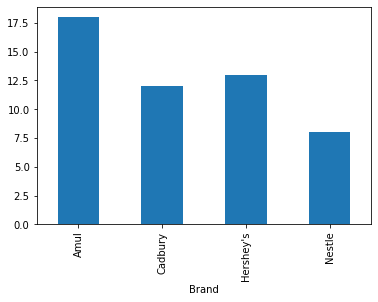

In [42]:
#Plotting bar graph showing the total rating of each brand using groupby function
profit_state=data['Rating'].groupby([data['Brand']]).sum()
profit_state.plot.bar()

In [25]:
#printing the number of unique brand using nunique function and their names using unique function
print(data["Brand"].nunique())
print(data["Brand"].unique())

4
['Amul' 'Cadbury' "Hershey's" 'Nestle']


In [26]:
#printing the number of unique flavour using nunique function and their names using unique function
print(data["Flavour"].nunique())
print(data["Flavour"].unique())

4
['Milk' 'Dark' 'Nuts' 'White']


In [16]:
#for futher analysis,we need to have binary values for all the categorical variables, so we use get_dummies function 
Chocolate_data=pd.get_dummies(data)
Chocolate_data.head()

,Rating,Brand_Amul,Brand_Cadbury,Brand_Hershey's,Brand_Nestle,Flavour_Dark,Flavour_Milk,Flavour_Nuts,Flavour_White,Shape_Bar,...,Shape_Round,Shape_Thin Bar,Price_Rs.200,Price_Rs.450,Price_Rs.50,Price_Rs.80,Size_150gm,Size_25gm,Size_300gm,Size_40gm
0,2,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,3,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
2,1,0,0,1,0,0,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0,1,1,...,0,0,0,1,0,0,0,0,1,0
4,3,0,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,1,0,0,0


In [28]:
#After adding dummies columns again we check the number of rows and columns
Chocolate_data.shape

(20, 21)

In [29]:
#Checking the name of all columns
Chocolate_data.columns

Index(['Rating', 'Brand_Amul', 'Brand_Cadbury', 'Brand_Hershey's',
       'Brand_Nestle', 'Flavour_Dark', 'Flavour_Milk', 'Flavour_Nuts',
       'Flavour_White', 'Shape_Bar', 'Shape_Cube', 'Shape_Round',
       'Shape_Thin Bar', 'Price_Rs.200', 'Price_Rs.450', 'Price_Rs.50',
       'Price_Rs.80', 'Size_150gm', 'Size_25gm', 'Size_300gm', 'Size_40gm'],
      dtype='object')

In [17]:
#Splitting of data for dependent variable
Y=Chocolate_data["Rating"]

In [18]:
#One category of each variable needs to be considered as a reference variable, so X is defined as a reference variable
#This variable needs to be remove from the list of independent variables
X=['Rating','Brand_Amul','Flavour_Milk','Shape_Cube','Price_Rs.50','Size_40gm']

In [19]:
#Here we are deleting the unwanted columns from the dataset
Chocolate_data.drop(labels=X,axis=1,inplace=True)

In [20]:
#Checking the first five record
Chocolate_data.head()

,Brand_Cadbury,Brand_Hershey's,Brand_Nestle,Flavour_Dark,Flavour_Nuts,Flavour_White,Shape_Bar,Shape_Round,Shape_Thin Bar,Price_Rs.200,Price_Rs.450,Price_Rs.80,Size_150gm,Size_25gm,Size_300gm
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0
2,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0
3,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1
4,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0


### Now on the combination of these attributes we apply OLS regression and from which we get beta coefficient and from this we find utility and utility gives us importance of combination

In [21]:
import statsmodels.api as sm

In [22]:
Chocolate_model=sm.OLS(Y,Chocolate_data).fit()

In [23]:
Chocolate_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Rating   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.845
Method:                 Least Squares   F-statistic:                              8.809
Date:                Fri, 15 Jan 2021   Prob (F-statistic):                     0.00679
Time:                        22:13:28   Log-Likelihood:                         -18.529
No. Observations:                  20   AIC:                                      65.06
Df Residuals:                       6   BIC:                                      79.00
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Brand_Cadbury      -1.0782      1.218     -0.885      0.410      -4.059       1.903
Brand_Hershey's    -0.3854      1.143     -0.337      0.747      -3.182       2.411
Brand_Nestle       -1.4685      0.932     -1.575      0.166      -3.749       0.812
Flavour_Dark        1.5935      1.033      1.543      0.174      -0.934       4.121
Flavour_Nuts        1.2904      1.026      1.258      0.255      -1.219       3.800
Flavour_White       0.9387      0.839      1.118      0.306      -1.115       2.993
Shape_Bar           0.8235      1.320      0.624      0.556      -2.407       4.054
Shape_Round        -0.8219      1.041     -0.789      0.460      -3.369       1.726
Shape_Thin Bar      0.7192      1.250      0.575      0.586      -2.339       3.777
Price_Rs.200       -1.0016      1.442     -0.695      0.513      -4.531       2.527
Price_Rs.450        0.8450      0.634      1.332      0.231      -0.707       2.397
Price_Rs.80         1.9395      1.042      1.861      0.112      -0.611       4.490
Size_150gm          2.8173      1.905      1.479      0.190      -1.845       7.479
Size_25gm           2.2496      0.775      2.902      0.027       0.353       4.146
Size_300gm          0.8450      0.634      1.332      0.231      -0.707       2.397
==============================================================================
Omnibus:                        0.261   Durbin-Watson:                   0.963
Prob(Omnibus):                  0.878   Jarque-Bera (JB):                0.444
Skew:                          -0.096   Prob(JB):                        0.801
Kurtosis:                       2.296   Cond. No.                     7.74e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.55e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Remaining analysis is done using excel in excel file